In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
boston_housing.load_data())

57026/57026 [==============================] - 0s 1us/step


In [3]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [8]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, "relu"),
      layers.Dense(64, "relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop",
                loss="mse",
                metrics=["mae"])
  return model

In [16]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_x = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_y = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
  x = np.concatenate([train_data[ : i * num_val_samples], train_data[(i + 1) * num_val_samples : ]], axis=0)
  y = np.concatenate([train_targets[ : i * num_val_samples], train_targets[(i + 1) * num_val_samples : ]], axis=0)
  model = build_model()
  history = model.fit(x, y, validation_data=(val_x, val_y), epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [21]:
len(all_mae_histories[0])

500

In [29]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
len(average_mae_history)

500

Text(0, 0.5, 'MAE')

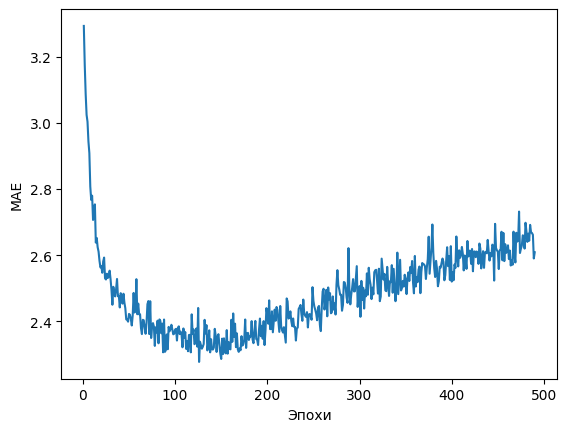

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.lineplot(x=range(1, len(average_mae_history[10:]) + 1), y=average_mae_history[10:])
plt.xlabel("Эпохи")
plt.ylabel("MAE")

In [34]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=140, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 14.5030 - mae: 2.4529


In [35]:
test_mae_score

2.45293927192688